In [1]:
import pandas as pd
import numpy as np

from ipynb.fs.full.utility_functions import (
    get_price_data,
    get_strategy_stats,
    find_cointegrated_pairs,
    calculate_covariance_directly,
)
from datetime import datetime
from enum import Enum

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
univ = [
    "BTCUSDT", "ETHUSDT", "ADAUSDT", "BNBUSDT", "XRPUSDT", "DOTUSDT", "MATICUSDT", "LTCUSDT", "BCHUSDT",
    "LINKUSDT", "XLMUSDT", "USDCUSDT", "EOSUSDT", "TRXUSDT", "XTZUSDT", "FILUSDT", "NEOUSDT", "DAIUSDT",
    "DASHUSDT", "VETUSDT", "ATOMUSDT", "AAVEUSDT", "UNIUSDT", "GRTUSDT", "THETAUSDT", "IOTAUSDT", "BUSDUSDT",
    "ZECUSDT", "YFIUSDT", "ETCUSDT", "WAVESUSDT", "COMPUSDT", "SNXUSDT", "DOGEUSDT", "MKRUSDT", "ZILUSDT",
    "SUSHIUSDT", "KSMUSDT", "OMGUSDT", "ONTUSDT", "ALGOUSDT", "EGLDUSDT", "BATUSDT", "DGBUSDT", "ZRXUSDT",
    "TUSDUSDT", "QTUMUSDT", "ICXUSDT", "AVAXUSDT", "RENUSDT", "HBARUSDT", "NEARUSDT", "LRCUSDT", "CELOUSDT",
    "KNCUSDT", "LSKUSDT", "OCEANUSDT", "QNTUSDT", "USTUSDT", "BANDUSDT", "MANAUSDT", "ENJUSDT", "ANTUSDT",
    "BNTUSDT", "ZENUSDT", "NMRUSDT", "RVNUSDT", "IOSTUSDT", "OXTUSDT", "CRVUSDT", "MATICUSDT", "HNTUSDT",
    "BALUSDT", "CHZUSDT"
]

px_4h = get_price_data(univ[:20], '4h', True, './class_project_input_prices.csv')
px_4h

,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT,MATICUSDT,LTCUSDT,BCHUSDT,LINKUSDT,XLMUSDT,USDCUSDT,EOSUSDT,TRXUSDT,XTZUSDT,FILUSDT,NEOUSDT,DAIUSDT,DASHUSDT,VETUSDT
open_time,,,,,,,,,,,,,,,,,,,,
2020-12-20 00:00:00,23353.97,646.62,0.16284,32.9681,0.56944,NaN,NaN,117.34,313.46,NaN,0.17754,NaN,NaN,NaN,NaN,NaN,17.597,NaN,NaN,0.017081
2020-12-20 04:00:00,23604.24,655.23,0.16638,33.6559,0.57916,NaN,NaN,121.30,340.00,NaN,0.18064,NaN,NaN,NaN,NaN,NaN,17.951,NaN,NaN,0.017149
2020-12-20 08:00:00,23549.50,652.88,0.16463,34.8228,0.57948,NaN,NaN,118.09,349.70,NaN,0.17948,NaN,NaN,NaN,NaN,NaN,18.076,NaN,NaN,0.017162
2020-12-20 12:00:00,23880.85,653.24,0.16542,35.0120,0.57798,NaN,NaN,119.10,361.21,NaN,0.17933,NaN,NaN,NaN,NaN,NaN,18.345,NaN,NaN,0.016960
2020-12-20 16:00:00,23932.71,649.82,0.16502,34.7042,0.57306,NaN,NaN,116.60,357.09,NaN,0.17903,NaN,NaN,NaN,NaN,NaN,18.085,NaN,NaN,0.016622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-08-30 16:00:00,108921.64,4352.10,0.81950,856.7600,2.80720,3.816,NaN,110.23,542.00,23.36,0.35990,0.9997,0.475,NaN,0.7255,2.271,6.860,0.9845,23.36,0.024600
2025-08-30 20:00:00,108569.75,4374.56,0.82170,862.6200,2.81940,3.773,NaN,110.77,552.90,23.47,0.36020,0.9999,0.475,NaN,0.7345,2.271,6.920,0.9845,23.86,0.024660
2025-08-31 00:00:00,109155.73,4486.79,0.83590,863.4900,2.85180,3.867,NaN,111.67,551.30,23.90,0.36380,0.9999,0.475,NaN,0.7346,2.335,6.920,1.0028,24.99,0.024850


In [3]:
px_4h

,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT,MATICUSDT,LTCUSDT,BCHUSDT,LINKUSDT,XLMUSDT,USDCUSDT,EOSUSDT,TRXUSDT,XTZUSDT,FILUSDT,NEOUSDT,DAIUSDT,DASHUSDT,VETUSDT
open_time,,,,,,,,,,,,,,,,,,,,
2020-12-20 00:00:00,23353.97,646.62,0.16284,32.9681,0.56944,NaN,NaN,117.34,313.46,NaN,0.17754,NaN,NaN,NaN,NaN,NaN,17.597,NaN,NaN,0.017081
2020-12-20 04:00:00,23604.24,655.23,0.16638,33.6559,0.57916,NaN,NaN,121.30,340.00,NaN,0.18064,NaN,NaN,NaN,NaN,NaN,17.951,NaN,NaN,0.017149
2020-12-20 08:00:00,23549.50,652.88,0.16463,34.8228,0.57948,NaN,NaN,118.09,349.70,NaN,0.17948,NaN,NaN,NaN,NaN,NaN,18.076,NaN,NaN,0.017162
2020-12-20 12:00:00,23880.85,653.24,0.16542,35.0120,0.57798,NaN,NaN,119.10,361.21,NaN,0.17933,NaN,NaN,NaN,NaN,NaN,18.345,NaN,NaN,0.016960
2020-12-20 16:00:00,23932.71,649.82,0.16502,34.7042,0.57306,NaN,NaN,116.60,357.09,NaN,0.17903,NaN,NaN,NaN,NaN,NaN,18.085,NaN,NaN,0.016622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-08-30 16:00:00,108921.64,4352.10,0.81950,856.7600,2.80720,3.816,NaN,110.23,542.00,23.36,0.35990,0.9997,0.475,NaN,0.7255,2.271,6.860,0.9845,23.36,0.024600
2025-08-30 20:00:00,108569.75,4374.56,0.82170,862.6200,2.81940,3.773,NaN,110.77,552.90,23.47,0.36020,0.9999,0.475,NaN,0.7345,2.271,6.920,0.9845,23.86,0.024660
2025-08-31 00:00:00,109155.73,4486.79,0.83590,863.4900,2.85180,3.867,NaN,111.67,551.30,23.90,0.36380,0.9999,0.475,NaN,0.7346,2.335,6.920,1.0028,24.99,0.024850


In [4]:
# px_4h["GRTUSDT"].loc[~np.isnan(px_4h["GRTUSDT"])]

In [5]:
# grt_px = px_4h["GRTUSDT"].loc[datetime(2023, 1, 1, 0, 0):]
# eth_px = px_4h["ETHUSDT"].loc[datetime(2023, 1, 1, 0, 0):]

In [6]:
# cov = px_4h["ETHUSDT"].rolling(6 * 182).cov(px_4h["GRTUSDT"])
# var_grt = px_4h["GRTUSDT"].rolling(6 * 182).var()
# beta = cov / var_grt
# spread = px_4h["ETHUSDT"] - beta * px_4h["GRTUSDT"]
# spread

In [7]:
# import matplotlib.pyplot as plt

# plt.figure(figsize=(16, 5))
# plt.plot(spread)

# plt.grid()
# plt.show()

In [8]:
# from statsmodels.tsa.stattools import coint

# score, pvalue, _ = coint(px_4h["ETHUSDT"].iloc[(-6*182):], px_4h["GRTUSDT"].iloc[(-6*182):])
# score

In [9]:
# score

In [10]:
# pvalue

In [11]:
# score, pvalue, _ = coint(
#     px_4h["ETHUSDT"].loc[datetime(2022, 9, 1, 0, 0):datetime(2023, 3, 1, 0, 0)],
#     px_4h["GRTUSDT"].loc[datetime(2022, 9, 1, 0, 0):datetime(2023, 3, 1, 0, 0)]
# )

In [12]:
# score

In [13]:
# pvalue

In [ ]:
period_px_4h = px_4h.loc[datetime(2021, 6, 30, 0, 0):datetime(2022, 6, 30, 20, 0)]

pvalue_matrix, pairs = find_cointegrated_pairs(
    period_px_4h,
    0.05
)

In [15]:
pvalue_matrix

,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT,MATICUSDT,LTCUSDT,BCHUSDT,LINKUSDT,XLMUSDT,USDCUSDT,EOSUSDT,TRXUSDT,XTZUSDT,FILUSDT,NEOUSDT,DAIUSDT,DASHUSDT,VETUSDT
BTCUSDT,1.000000,0.248470,0.839340,0.474094,1.0,0.662529,0.820977,0.296989,0.561748,0.503418,0.461253,0.080728,0.345209,0.955989,1.0,0.735179,0.804572,1.0,1.0,0.491863
ETHUSDT,0.248470,1.000000,0.862243,0.087318,1.0,0.493075,0.957370,0.477253,0.621671,0.851639,0.533555,0.161720,0.411759,0.966351,1.0,0.755426,0.830716,1.0,1.0,0.742622
ADAUSDT,0.839340,0.862243,1.000000,0.877855,1.0,0.008925,0.094845,0.535027,0.319553,0.000506,0.341437,0.074117,0.268782,0.662489,1.0,0.014237,0.090999,1.0,1.0,0.382549
BNBUSDT,0.474094,0.087318,0.877855,1.000000,1.0,0.219395,0.642658,0.326947,0.488913,0.694297,0.529025,0.122474,0.054887,0.910617,1.0,0.643596,0.658104,1.0,1.0,0.527101
XRPUSDT,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.0,1.0,1.000000
DOTUSDT,0.662529,0.493075,0.008925,0.219395,1.0,1.000000,0.065171,0.039049,0.140851,0.199190,0.004254,0.108839,0.058737,0.654880,1.0,0.009530,0.194006,1.0,1.0,0.098909
MATICUSDT,0.820977,0.957370,0.094845,0.642658,1.0,0.065171,1.000000,0.112372,0.581005,0.141864,0.128384,0.018304,0.293276,0.778731,1.0,0.002269,0.185101,1.0,1.0,0.706779
LTCUSDT,0.296989,0.477253,0.535027,0.326947,1.0,0.039049,0.112372,1.000000,0.516542,0.168027,0.034047,0.027830,0.240887,0.823225,1.0,0.375627,0.669776,1.0,1.0,0.044305
BCHUSDT,0.561748,0.621671,0.319553,0.488913,1.0,0.140851,0.581005,0.516542,1.000000,0.425862,0.056247,0.131283,0.134452,0.914362,1.0,0.651196,0.524842,1.0,1.0,0.198448
LINKUSDT,0.503418,0.851639,0.000506,0.694297,1.0,0.199190,0.141864,0.168027,0.425862,1.000000,0.155732,0.001456,0.003584,0.659996,1.0,0.006150,0.005078,1.0,1.0,0.134794


In [16]:
pairs.sort(key=lambda x: x[2])
pairs

[('USDCUSDT', 'NEOUSDT', 9.517703959468135e-06),
 ('USDCUSDT', 'EOSUSDT', 5.120140595714432e-05),
 ('ADAUSDT', 'LINKUSDT', 0.0005058071770055432),
 ('USDCUSDT', 'FILUSDT', 0.0009226144952663198),
 ('LINKUSDT', 'USDCUSDT', 0.0014555729718135338),
 ('USDCUSDT', 'VETUSDT', 0.0021655744916692153),
 ('MATICUSDT', 'FILUSDT', 0.00226857242195219),
 ('LINKUSDT', 'EOSUSDT', 0.0035835989557083748),
 ('DOTUSDT', 'XLMUSDT', 0.0042537047372098735),
 ('LINKUSDT', 'NEOUSDT', 0.005078421628344061),
 ('LINKUSDT', 'FILUSDT', 0.00614996720576047),
 ('XLMUSDT', 'EOSUSDT', 0.006549294361324753),
 ('ADAUSDT', 'DOTUSDT', 0.008925448936488261),
 ('DOTUSDT', 'FILUSDT', 0.009530224719543165),
 ('ADAUSDT', 'FILUSDT', 0.014236644374761104),
 ('XLMUSDT', 'VETUSDT', 0.016385536509369705),
 ('MATICUSDT', 'USDCUSDT', 0.01830404985315999),
 ('LTCUSDT', 'USDCUSDT', 0.02783045819524239),
 ('LTCUSDT', 'XLMUSDT', 0.03404717163832108),
 ('DOTUSDT', 'LTCUSDT', 0.03904912900367612),
 ('FILUSDT', 'NEOUSDT', 0.0415151035843349

In [17]:
pairs_valid_in_period = []
interval_px = px_4h.loc[datetime(2022, 1, 1, 0, 0):datetime(2022, 6, 30, 20, 0)]

for coin_a, coin_b, pvalue in pairs:
    if np.isnan(interval_px[coin_a]).any():
        continue
    if np.isnan(interval_px[coin_b]).any():
        continue
    pairs_valid_in_period.append((coin_a, coin_b, pvalue))

pairs_valid_in_period

[('USDCUSDT', 'NEOUSDT', 9.517703959468135e-06),
 ('USDCUSDT', 'FILUSDT', 0.0009226144952663198),
 ('USDCUSDT', 'VETUSDT', 0.0021655744916692153),
 ('DOTUSDT', 'XLMUSDT', 0.0042537047372098735),
 ('ADAUSDT', 'DOTUSDT', 0.008925448936488261),
 ('DOTUSDT', 'FILUSDT', 0.009530224719543165),
 ('ADAUSDT', 'FILUSDT', 0.014236644374761104),
 ('XLMUSDT', 'VETUSDT', 0.016385536509369705),
 ('LTCUSDT', 'USDCUSDT', 0.02783045819524239),
 ('LTCUSDT', 'XLMUSDT', 0.03404717163832108),
 ('DOTUSDT', 'LTCUSDT', 0.03904912900367612),
 ('FILUSDT', 'NEOUSDT', 0.04151510358433499),
 ('LTCUSDT', 'VETUSDT', 0.044304800788519574)]

In [18]:
independent_coin = "DOTUSDT"
dependent_coin = "XLMUSDT"

cov = px_4h[dependent_coin].rolling(6 * 182).cov(px_4h[independent_coin])
var_independent = px_4h[independent_coin].rolling(6 * 182).var()
beta = cov / var_independent
spread = px_4h[dependent_coin] - beta * px_4h[independent_coin]

spread

open_time
2020-12-20 00:00:00         NaN
2020-12-20 04:00:00         NaN
2020-12-20 08:00:00         NaN
2020-12-20 12:00:00         NaN
2020-12-20 16:00:00         NaN
                         ...   
2025-08-30 16:00:00    0.236283
2025-08-30 20:00:00    0.238052
2025-08-31 00:00:00    0.238823
2025-08-31 04:00:00    0.235588
2025-08-31 08:00:00    0.235538
Length: 10291, dtype: float64

In [19]:
px_4h["ADAUSDT"].loc[~np.isnan(px_4h["ADAUSDT"])]

open_time
2020-12-20 00:00:00    0.16284
2020-12-20 04:00:00    0.16638
2020-12-20 08:00:00    0.16463
2020-12-20 12:00:00    0.16542
2020-12-20 16:00:00    0.16502
                        ...   
2025-08-30 16:00:00    0.81950
2025-08-30 20:00:00    0.82170
2025-08-31 00:00:00    0.83590
2025-08-31 04:00:00    0.82760
2025-08-31 08:00:00    0.82300
Name: ADAUSDT, Length: 10291, dtype: float64

In [20]:
px_4h["LINKUSDT"].loc[~np.isnan(px_4h["LINKUSDT"])]

open_time
2022-01-14 00:00:00    25.20
2022-01-14 04:00:00    24.94
2022-01-14 08:00:00    24.07
2022-01-14 12:00:00    24.72
2022-01-14 16:00:00    24.93
                       ...  
2025-08-30 16:00:00    23.36
2025-08-30 20:00:00    23.47
2025-08-31 00:00:00    23.90
2025-08-31 04:00:00    23.76
2025-08-31 08:00:00    23.76
Name: LINKUSDT, Length: 7952, dtype: float64

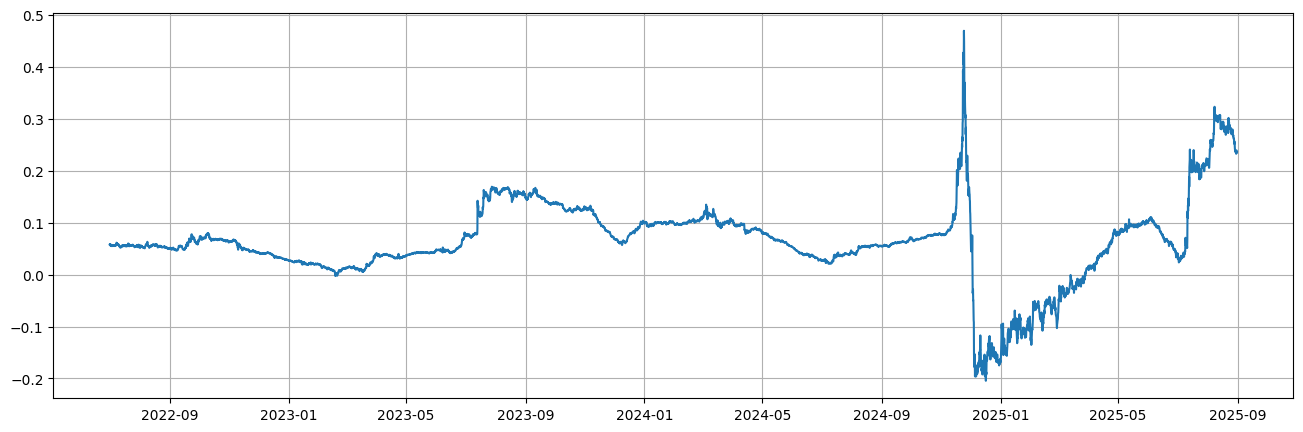

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 5))
plt.plot(spread.loc[datetime(2022, 7, 1, 0, 0):datetime(2025, 8, 31, 20, 0)])

plt.grid()
plt.show()

In [22]:
z_scores = (spread - spread.rolling(6 * 365).mean()) / spread.rolling(6 * 365).std()
z_scores

open_time
2020-12-20 00:00:00         NaN
2020-12-20 04:00:00         NaN
2020-12-20 08:00:00         NaN
2020-12-20 12:00:00         NaN
2020-12-20 16:00:00         NaN
                         ...   
2025-08-30 16:00:00    1.546775
2025-08-30 20:00:00    1.559768
2025-08-31 00:00:00    1.564539
2025-08-31 04:00:00    1.536468
2025-08-31 08:00:00    1.534556
Length: 10291, dtype: float64

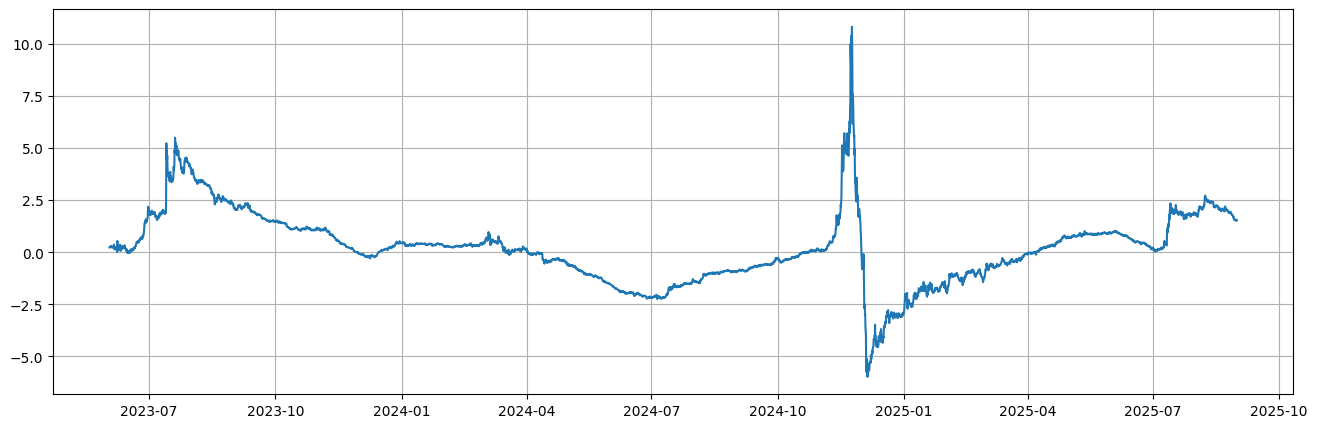

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 5))
plt.plot(z_scores.loc[datetime(2022, 7, 1, 0, 0):datetime(2025, 8, 31, 20, 0)])

plt.grid()
plt.show()

In [24]:
independent_coin = "DOTUSDT"
dependent_coin = "XLMUSDT"

cov = px_4h[dependent_coin].rolling(6 * 182).cov(px_4h[independent_coin])
var_independent = px_4h[independent_coin].rolling(6 * 182).var()

beta = cov / var_independent
spread = px_4h[dependent_coin] - beta * px_4h[independent_coin]
z_scores = (spread - spread.rolling(6 * 45).mean()) / spread.rolling(6 * 45).std()

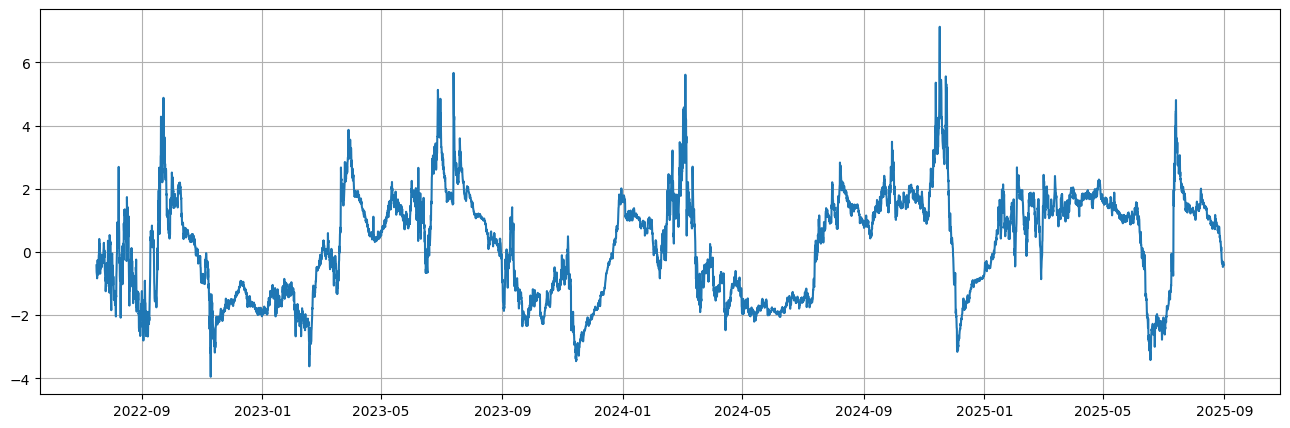

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 5))
plt.plot(z_scores.loc[datetime(2022, 7, 1, 0, 0):datetime(2025, 8, 31, 20, 0)])

plt.grid()
plt.show()

In [58]:
df = pd.DataFrame({
    "beta": beta,
    "spread": spread,
    "z_score": z_scores,
})

# XLM ~ b * DOT + a

df["spread position"] = np.nan
df.loc[abs(df["z_score"].shift()) < 0.75, "spread position"] = 0
df.loc[df["z_score"].shift() > 1.75, "spread position"] = -1
df.loc[df["z_score"].shift() < -1.75, "spread position"] = 1
df["spread position"] = df["spread position"].ffill()
df.loc[np.isnan(df["spread position"]), "spread position"] = 0

open_long_spread_indices = ((df["spread position"] == 1) & (df["spread position"].shift() != 1))
open_short_spread_indices = ((df["spread position"] == -1) & (df["spread position"].shift() != -1))
close_long_spread_indices = (df["spread position"] == 0) & (df["spread position"].shift() == 1)
close_short_spread_indices = (df["spread position"] == 0) & (df["spread position"].shift() == -1)

df["XLM share count"] = np.nan
df["DOT share count"] = np.nan
df.loc[open_long_spread_indices, "XLM share count"] = 1.0
df.loc[open_long_spread_indices, "DOT share count"] = -1 * df.shift().loc[open_long_spread_indices, "beta"]
df.loc[open_short_spread_indices, "XLM share count"] = -1.0
df.loc[open_short_spread_indices, "DOT share count"] = df.shift().loc[open_short_spread_indices, "beta"]
df.loc[close_long_spread_indices, "XLM share count"] = 0.0
df.loc[close_long_spread_indices, "DOT share count"] = 0.0
df.loc[close_short_spread_indices, "XLM share count"] = 0.0
df.loc[close_short_spread_indices, "DOT share count"] = 0.0
df["XLM share count"] = df["XLM share count"].ffill()
df["DOT share count"] = df["DOT share count"].ffill()
df.loc[np.isnan(df["XLM share count"]), "XLM share count"] = 0.0
df.loc[np.isnan(df["DOT share count"]), "DOT share count"] = 0.0

######################

# df["long the spread"] = ((df["z_scores"] < -1.75) & (df["z_scores"].shift() >= -1.75)).astype(int)
# df["short the spread"] = ((df["z_scores"] > 1.75) & (df["z_scores"].shift() <= 1.75)).astype(int) * -1

# df["num DOT shares"] = np.nan
# df["num XLM shares"] = np.nan
# df["num DOT shares"] = (-1 * df["long the spread"].shift() - df["short the spread"].shift()) * df["beta"].shift()
# df["num XLM shares"] = df["long the spread"].shift() + df["short the spread"].shift()
# df.loc[abs(df["z_scores"]) < 0.75, "num DOT shares"] = 0.0
# df.loc[abs(df["z_scores"]) < 0.75, "num XLM shares"] = 0.0

In [59]:
df

,beta,spread,z_score,spread position,XLM share count,DOT share count
open_time,,,,,,
2020-12-20 00:00:00,NaN,NaN,NaN,0.0,0.0,0.0
2020-12-20 04:00:00,NaN,NaN,NaN,0.0,0.0,0.0
2020-12-20 08:00:00,NaN,NaN,NaN,0.0,0.0,0.0
2020-12-20 12:00:00,NaN,NaN,NaN,0.0,0.0,0.0
2020-12-20 16:00:00,NaN,NaN,NaN,0.0,0.0,0.0
...,...,...,...,...,...,...
2025-08-30 16:00:00,0.032394,0.236283,-0.381285,0.0,0.0,0.0
2025-08-30 20:00:00,0.032374,0.238052,-0.340339,0.0,0.0,0.0
2025-08-31 00:00:00,0.032319,0.238823,-0.324648,0.0,0.0,0.0


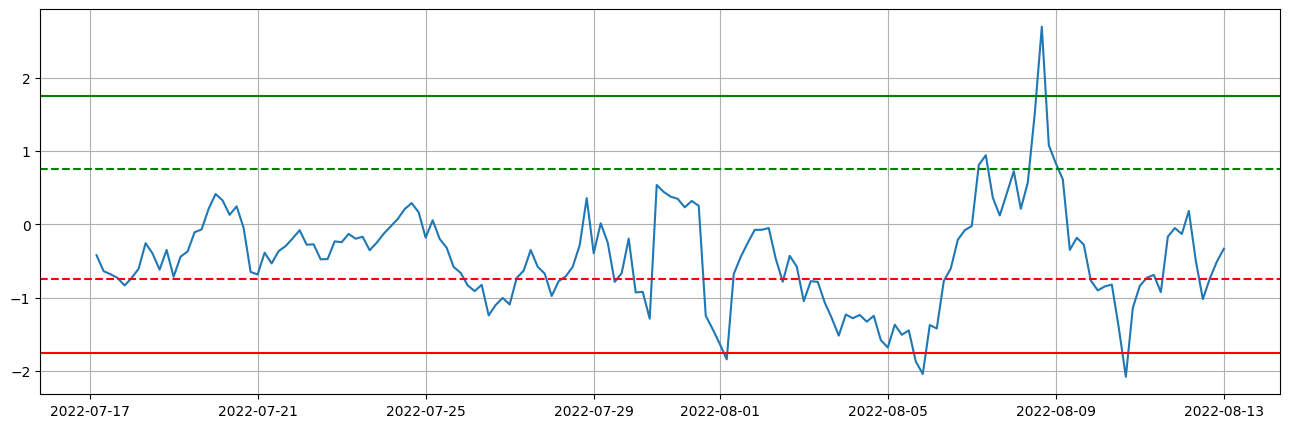

In [64]:
plt.figure(figsize=(16,5))
plt.plot(df.loc[datetime(2022, 7, 17, 0, 0):datetime(2022, 8, 13, 0, 0), "z_score"])

plt.axhline(1.75, color="green", linestyle="-")
plt.axhline(0.75, color="green", linestyle="--")

plt.axhline(-1.75, color="red", linestyle="-")
plt.axhline(-0.75, color="red", linestyle="--")

plt.grid()
plt.show()

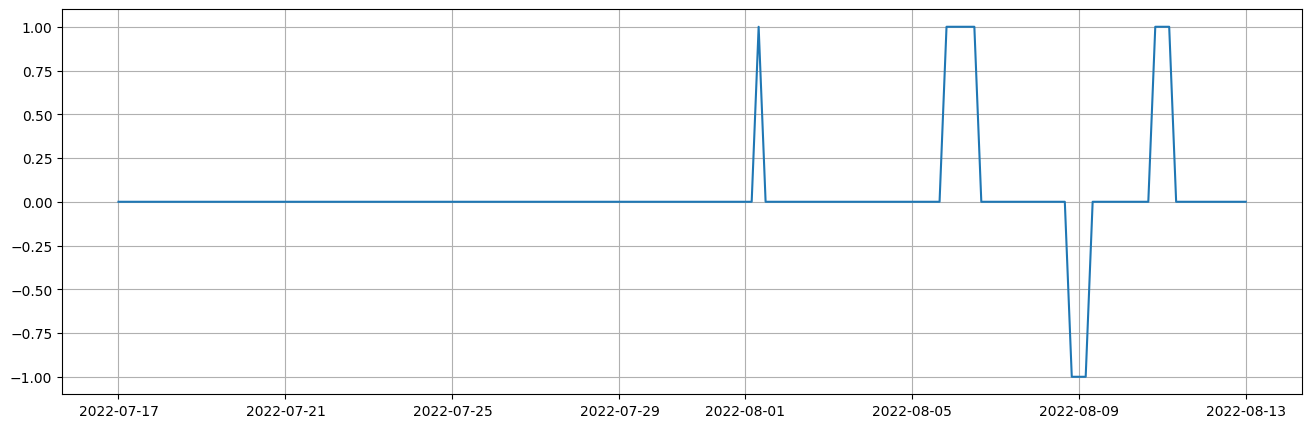

In [63]:
plt.figure(figsize=(16,5))
plt.plot(df.loc[datetime(2022, 7, 17, 0, 0):datetime(2022, 8, 13, 0, 0), "spread position"])

plt.grid()
plt.show()